<a href="https://colab.research.google.com/github/lhodzic1/Movie-Reviews-Sentiment-Analysis/blob/main/Plotting_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!%%cache
from google.colab import drive

drive.mount('/content/drive')

/bin/bash: line 0: fg: no job control
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [ ]:
def str_to_arr(string_array):
  string_array = string_array.replace("[", "")
  string_array = string_array.replace("]", "")
  string_array = string_array.replace(",", "")
  #string_array = string_array.replace("  ", " ")
  string_array = string_array.split(' ')
  
  for i in range(len(string_array)):
    if string_array[i] == '':
      string_array.pop(i)
  return [float(string_number) for string_number in string_array]


In [ ]:
def plot_distributions(df, model, option = 1): #1 probabilities string, 2 probabilities list, 3 one probability for prediction
  if option == 1:
    df.loc[:, 'Probability'] = df.loc[:, 'Probability'].apply(str_to_arr)
  for i in range(len(df.loc[:, 'Probability'])):
    if option == 3:
      df.loc[i, 'Probability'] = 1 - df.loc[i, 'Probability']
    elif option != 3:
      df.loc[i, 'Probability'] = df.loc[i, 'Probability'][0]

  data_0 = df.loc[df['Label'] == 0]
  data_1 = df.loc[df['Label'] == 1]
  data_2 = df.loc[df['Label'] == 2]
  data_3 = df.loc[df['Label'] == 3]
  data_4 = df.loc[df['Label'] == 4]
  df.drop(columns = ['Id', 'Prediction'], inplace = True)
  fig, ax =plt.subplots(1,6, figsize=(24, 5))
  sns.kdeplot(data_0['Probability'], shade=True, color = 'red', ax=ax[0]).set(xlim=(0, 1), ylim=(0,6))
  sns.kdeplot(data_1['Probability'], shade=True, color = 'orange', ax=ax[1]).set(xlim=(0, 1), ylim=(0,6))
  sns.kdeplot(data_2['Probability'], shade=True, color = 'yellow', ax=ax[2]).set(xlim=(0, 1), ylim=(0,6))
  sns.kdeplot(data_3['Probability'], shade=True, color = 'green', ax=ax[3]).set(xlim=(0, 1), ylim=(0,6))
  sns.kdeplot(data_4['Probability'], shade=True, color = 'blue', ax=ax[4]).set(xlim=(0, 1), ylim=(0,6))
  sns.kdeplot(data_0['Probability'], shade=True, color = 'red').set(xlim=(0, 1), ylim=(0,6))
  sns.kdeplot(data_1['Probability'], shade=True, color = 'orange')
  sns.kdeplot(data_2['Probability'], shade=True, color = 'yellow')
  sns.kdeplot(data_3['Probability'], shade=True, color = 'green')
  sns.kdeplot(data_4['Probability'], shade=True, color = 'blue')
  if model == 1:
    fig.suptitle("BERT probability distribution sentiment 0, 1, 2, 3, 4, all", fontsize=14)
  if model == 2:
    fig.suptitle("BILSTM probability distribution sentiment 0, 1, 2, 3, 4, all", fontsize=14)
  if model == 3:
    fig.suptitle("LinearSVC probability distribution sentiment 0, 1, 2, 3, 4, all", fontsize=14)
  if model == 4:
    fig.suptitle("Logistic Regression probability distribution sentiment 0, 1, 2, 3, 4, all", fontsize=14)
  fig.show()


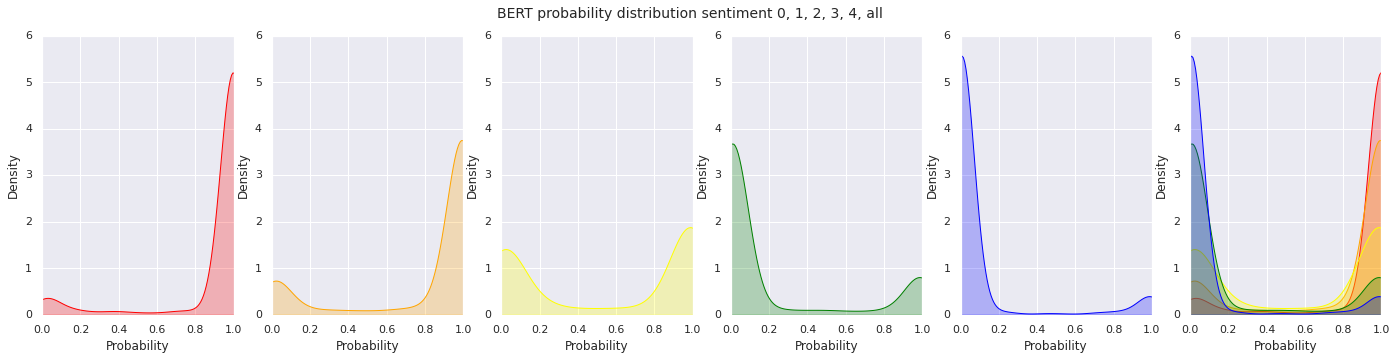

In [ ]:
df_bert_neutral_nopreprocess = pd.read_csv('drive/MyDrive/NLP/predictions/df_prob_neutral_without_preprocessing.csv')
plot_distributions(df_bert_neutral_nopreprocess, 1, 1)

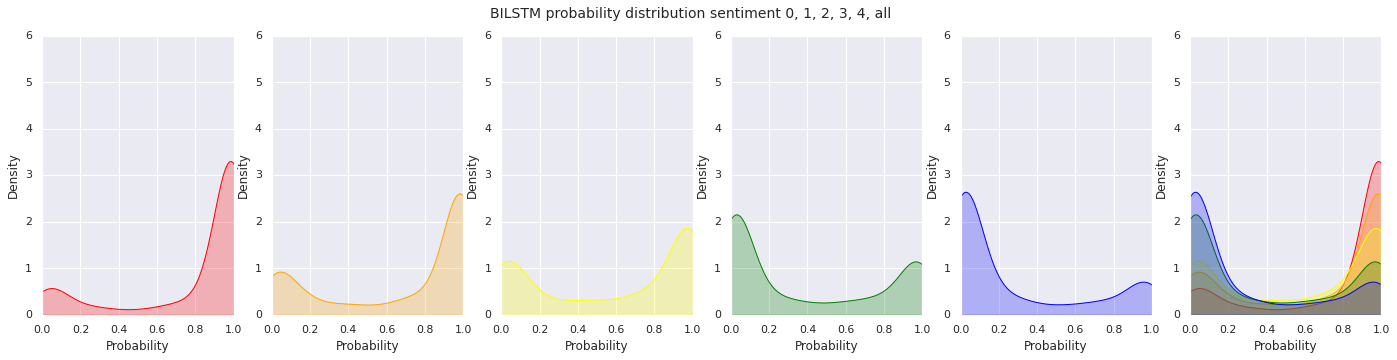

In [ ]:
df_bilstm_neutral_preprocess= pd.read_csv('drive/MyDrive/NLP/predictions/bilstm_neutral_preprocess.csv')
plot_distributions(df_bilstm_neutral_preprocess, 2, 3)

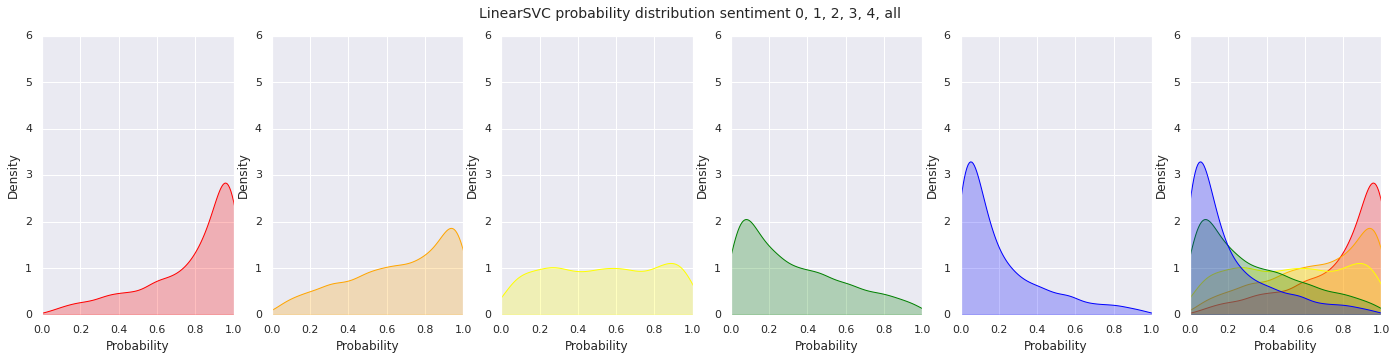

In [ ]:
df_LinearSVC_neutral_nopreprocess= pd.read_csv('drive/MyDrive/NLP/predictions/Neutral_LinearSVC_tfidf_without_preprocessing_both.csv')
plot_distributions(df_LinearSVC_neutral_nopreprocess, 3)


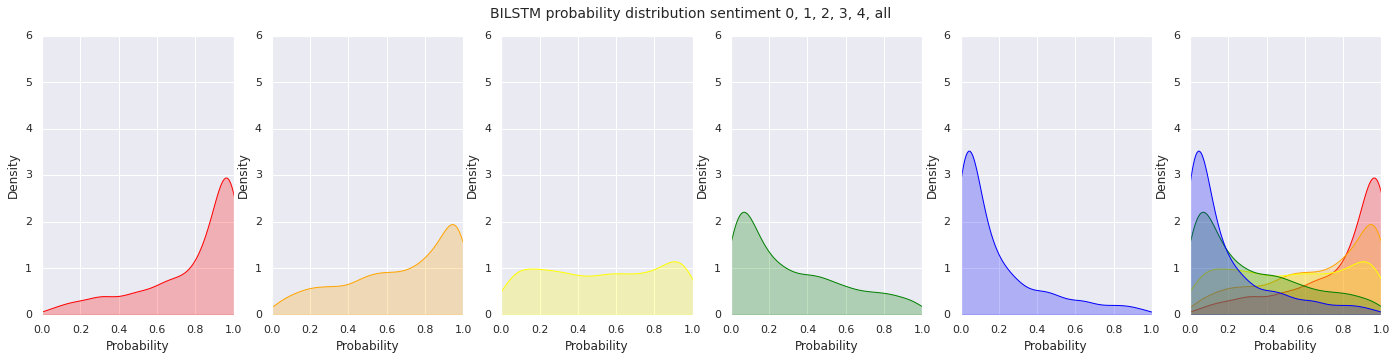

In [ ]:
df_logistic_regression_neutral_nopreprocess= pd.read_csv('drive/MyDrive/NLP/predictions/Neutral_LogisticRegression_tfidf_without_preprocessing_both.csv')
plot_distributions(df_logistic_regression_neutral_nopreprocess, 2)